In [27]:
import classification as classe 
import numpy as np

import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest ,f_classif
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC ,SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd


## Mise en place des données et quelques réglages 

In [29]:
df = pd.read_csv("/home/congo/Bureau/2022-m1-staps/motives_part/clustering.csv") 
#df = pd.read_csv("/home/congo/Bureau/2022-m1-staps/motives_part/boy.csv") 
#df = pd.read_csv("/home/congo/Bureau/2022-m1-staps/motives_part/girl.csv")


In [30]:
df.drop(df.columns[[0]], axis = 1, inplace = True) 
df.head()

,cluster3,cluster4,cluster5,Confort,Securite,Qualite,Force,Maintien,Puissance,Competition,...,Serenite,Sexy,Plaisir,Groupe,Partage,Role,Performance,Meilleur,Individualiste,detente
0,1,1,1,0.072732,0.065028,0.079676,0.098327,0.029093,0.032083,0.030411,...,0.015611,0.079372,0.206386,0.169235,0.004866,0.031171,0.010998,0.035884,0.025494,0.024582
1,2,3,4,0.978229,0.256652,0.370343,0.252782,0.323174,0.327528,0.252540,...,0.017417,0.015723,0.019110,0.021287,0.021529,0.018868,0.021287,0.017900,0.024432,0.017658
2,1,1,1,0.070048,0.054323,0.062636,0.087573,0.090062,0.152751,0.101287,...,0.013713,0.285805,0.022343,0.007677,0.103828,0.133054,0.031556,0.070207,0.135014,0.175676
3,1,2,2,0.290419,0.741154,0.153511,0.216930,0.167392,0.185084,0.305117,...,0.136636,0.339412,0.185084,0.300490,0.092270,0.079750,0.236255,0.249864,0.272183,0.333696
4,1,1,1,0.029809,0.098887,0.045072,0.158585,0.116455,0.067727,0.050238,...,0.121065,0.029650,0.045072,0.216773,0.060254,0.059221,0.069078,0.077822,0.063037,0.159777


In [31]:
y_3 = df.loc[:,'cluster3']
# y_4 = df.loc[:,'cluster4']
# y_5 = df.loc[:,'cluster5']


In [32]:
X = df
X.drop(df.columns[[0,1,2]], axis = 1, inplace = True) 

col_total  = X.columns
# print(col_total)

In [33]:
train_ratio = 0.80
test_ratio = 0.20
validation_ratio = 0.10

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y_3, test_size=test_ratio)



## 1) Modelisation et choix de l'algorithme de sélection

evaluation model 

In [34]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias = False) ,SelectKBest(f_classif , k=10))


SVC_3 = make_pipeline(preprocessor,SVC(random_state=0))
KNN_3 = make_pipeline(preprocessor,KNeighborsClassifier())
logreg_3 = make_pipeline(preprocessor,LogisticRegression())
LSVC_3 = make_pipeline(preprocessor,LinearSVC())


In [35]:
dict_of_models ={ 'KNN' :KNN_3,
                'logreg' :logreg_3,
                'LSVC' : LSVC_3,
                'SVC': SVC_3}

KNN
logreg
LSVC
SVC


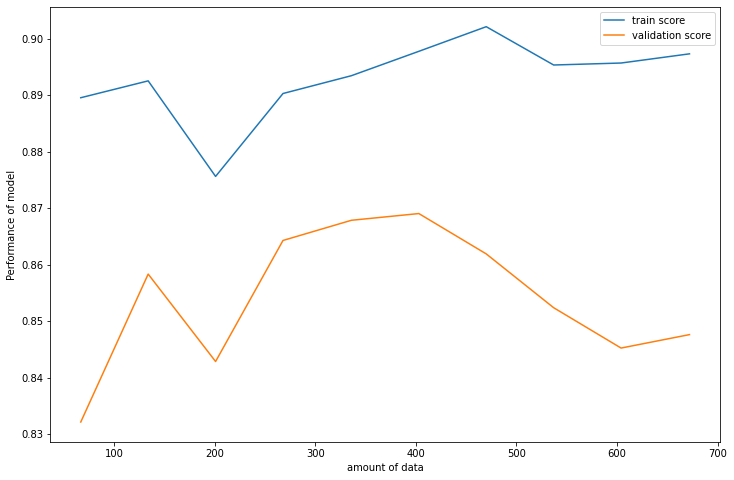

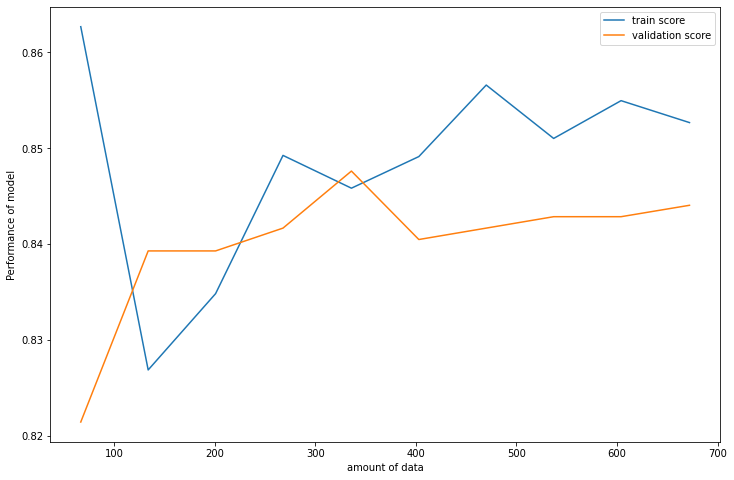

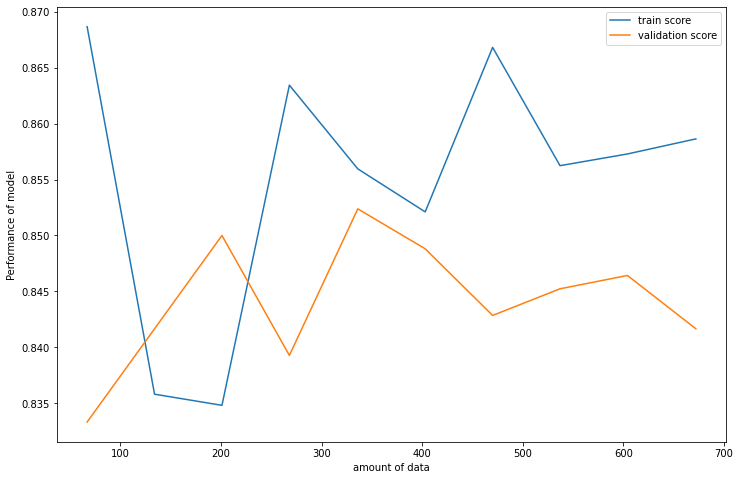

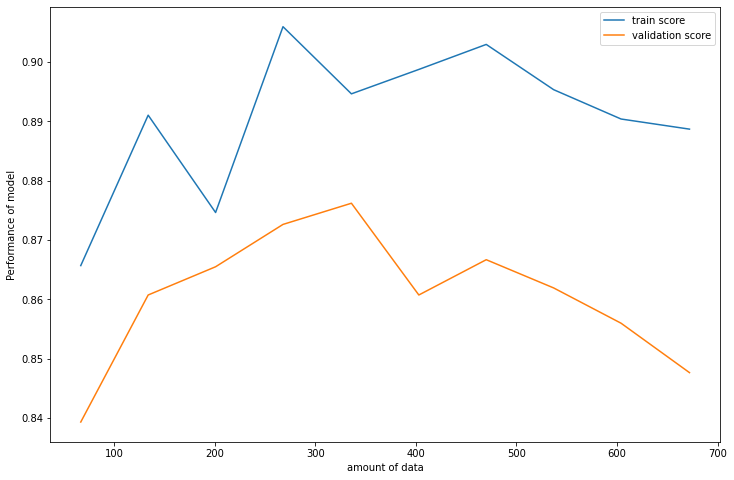

In [36]:
for names,model in dict_of_models.items() :
     print(names)
     classe.evaluation(model,X_train_3,y_train_3,X_test_3,y_test_3)

Optimisation des hyperparametres du modèle SVC et logistic

In [37]:
# optimiser SVC
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
model = SVC()
classe.optimiseur(model,parameters,X_train_3,y_train_3)

best parameters  {'C': 1, 'kernel': 'rbf'}
accuracy : 0.9583333333333333


In [38]:
#bon parametre SVC
model = SVC(kernel= 'rbf', C = 10)
parameters = {'kernel':'rbf', 'C':10}

In [39]:
# optimiser LogisticRegression
parameters = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
model = LogisticRegression()
#classe.optimiseur(model,parameters,X_train_3,y_train_3)

In [40]:

model = LogisticRegression(C= 1.0, penalty="l2")
parameters = {"C":1.0, "penalty":"l2"}
#classe.optimiseur(model,parameters,X_train_3,y_train_3)

In [41]:
# bon parametre LogisticRegression
model = LogisticRegression(C= 1.0, penalty="l2")
parameters = {"C":1.0, "penalty":"l2"}

## 2) Feature selection 

<AxesSubplot:>

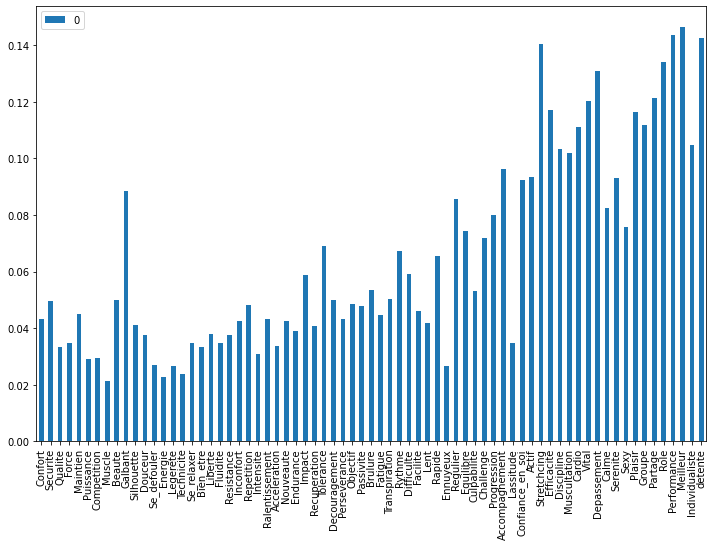

In [42]:
# quel seuil choisir  avec X_test ?
variance = X_test_3.var(axis = 0)
pd.DataFrame(variance,index = X_test_3.columns ).plot.bar(figsize = (12,8))

In [43]:
seuil = 0.06
X_train_3,X_test_3 = classe.selection_feature (X_test_3,X_train_3,seuil,col_total)

colonne garder size =  (29,)
colonne_garder =  ['Galbant' 'Tolerance' 'Rythme' 'Rapide' 'Regulier' 'Equilibre'
 'Challenge' 'Progression' 'Accompagnement' 'Confiance_en_soi' 'Actif'
 'Stretchcing' 'Efficacite' 'Discipline' 'Muscultation' 'Cardio' 'Vital'
 'Depassement' 'Calme' 'Serenite' 'Sexy' 'Plaisir' 'Groupe' 'Partage'
 'Role' 'Performance' 'Meilleur' 'Individualiste' 'detente']


In [44]:
seuil = 0.06
model = SVC(kernel= 'rbf', C = 10)
list_precision = []
list_recall = []
list_f1score = []
list_seuil = np.linspace(0.02,0.14,50)

colonne garder size =  (29,)
colonne_garder =  ['Galbant' 'Tolerance' 'Rythme' 'Rapide' 'Regulier' 'Equilibre'
 'Challenge' 'Progression' 'Accompagnement' 'Confiance_en_soi' 'Actif'
 'Stretchcing' 'Efficacite' 'Discipline' 'Muscultation' 'Cardio' 'Vital'
 'Depassement' 'Calme' 'Serenite' 'Sexy' 'Plaisir' 'Groupe' 'Partage'
 'Role' 'Performance' 'Meilleur' 'Individualiste' 'detente']
colonne garder size =  (29,)
colonne_garder =  ['Galbant' 'Tolerance' 'Rythme' 'Rapide' 'Regulier' 'Equilibre'
 'Challenge' 'Progression' 'Accompagnement' 'Confiance_en_soi' 'Actif'
 'Stretchcing' 'Efficacite' 'Discipline' 'Muscultation' 'Cardio' 'Vital'
 'Depassement' 'Calme' 'Serenite' 'Sexy' 'Plaisir' 'Groupe' 'Partage'
 'Role' 'Performance' 'Meilleur' 'Individualiste' 'detente']
colonne garder size =  (29,)
colonne_garder =  ['Galbant' 'Tolerance' 'Rythme' 'Rapide' 'Regulier' 'Equilibre'
 'Challenge' 'Progression' 'Accompagnement' 'Confiance_en_soi' 'Actif'
 'Stretchcing' 'Efficacite' 'Discipline' 'Musc

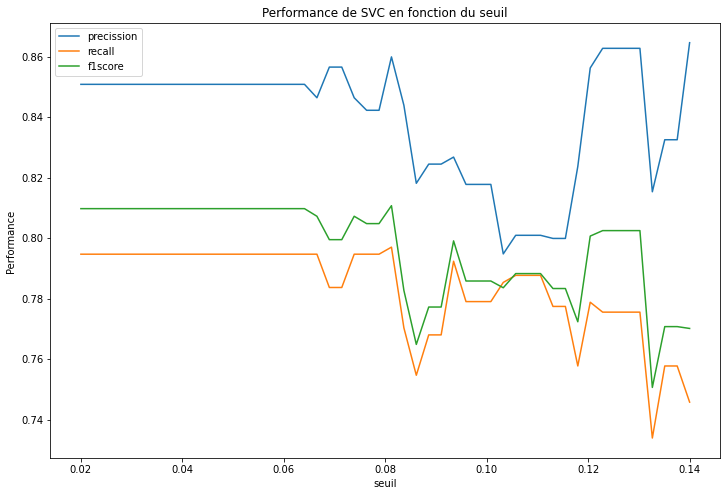

In [45]:

for seuil  in list_seuil :
    list_precision = classe.give_list_precision(model,X_test_3,y_test_3,X_train_3,y_train_3,seuil,col_total ,list_precision )
    list_recall = classe.give_list_recall(model,X_test_3,y_test_3,X_train_3,y_train_3,seuil,col_total ,list_recall )
    list_f1score = classe.give_list_f1score(model,X_test_3,y_test_3,X_train_3,y_train_3,seuil,col_total ,list_f1score)




plt.figure(figsize =(12,8))
plt.plot(list_seuil,list_precision,label = 'precission')
plt.plot(list_seuil,list_recall,label = 'recall')
plt.plot(list_seuil,list_f1score ,label = 'f1score')
plt.legend()
plt.title('Performance de SVC en fonction du seuil')
plt.xlabel('seuil')
plt.ylabel('Performance ')
plt.show()


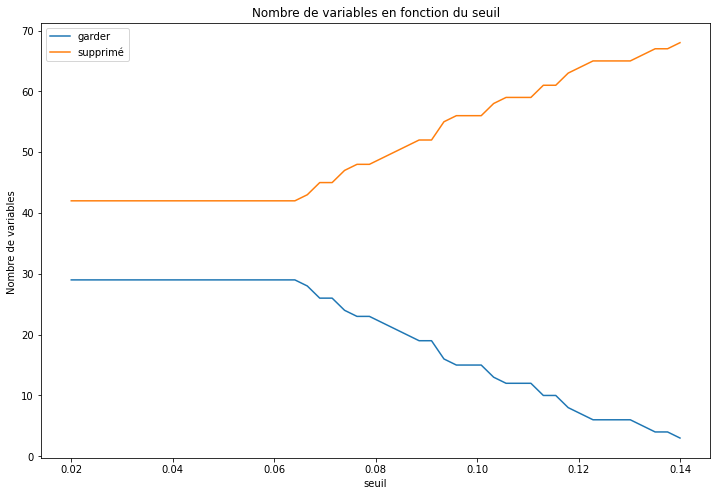

In [46]:
list_seuil = np.linspace(0.02,0.14,50)
list_col_sup = []
list_col_keep = []
for seuil in list_seuil :
    N_suprim , N_keep = classe.col_selection(X_test_3,seuil,col_total)
    list_col_sup.append(N_suprim)
    list_col_keep.append(N_keep)

plt.figure(figsize =(12,8))
plt.plot(list_seuil,list_col_keep,label = 'garder')
plt.plot(list_seuil,list_col_sup ,label = 'supprimé')
plt.legend()
plt.title('Nombre de variables en fonction du seuil')
plt.xlabel('seuil')
plt.ylabel('Nombre de variables ')
plt.show()

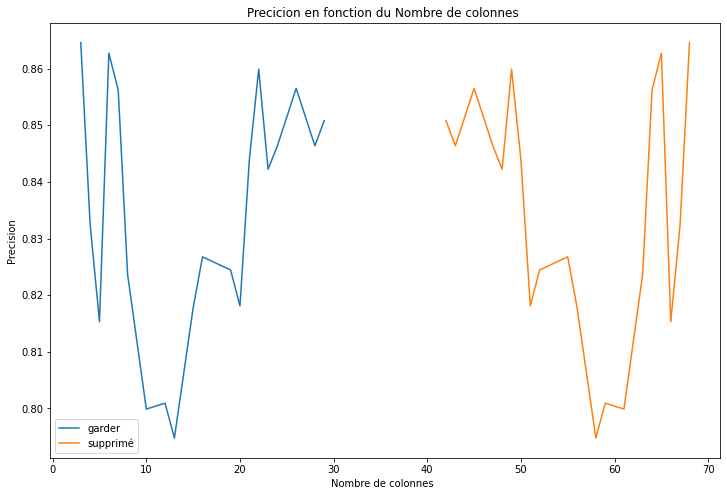

In [47]:
plt.figure(figsize =(12,8))
plt.plot(list_col_keep,list_precision,label = 'garder')
plt.plot(list_col_sup,list_precision ,label = 'supprimé')
plt.legend()
plt.title('Precicion en fonction du Nombre de colonnes ')
plt.ylabel('Precision')
plt.xlabel('Nombre de colonnes  ')
plt.show()

## 3) Tester le modele finale

In [48]:
model = SVC(kernel= 'rbf', C = 10,probability=True)
parameters = {"C":1.0, "penalty":"l2"}

In [49]:
classe.fit_model(model,X_train_3,y_train_3)
y_pred_3_log = classe.prediction(model ,X_test_3)

In [50]:
classe.print_resulat(y_test_3,y_pred_3_log)

recall_score =  0.7946853146853147
f1-score =  0.8097343295973433
precision_score =  0.850805693350193


confusion  log_3 
 [[135   4   4]
 [ 14  11   0]
 [  0   0  42]]
tab log_3 
            y_pred : 0  y_pred : 1  y_pred : 2
y_true: 0         135           4           4
y_true: 1          14          11           0
y_true: 2           0           0          42


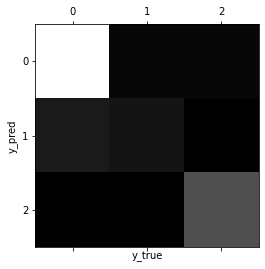

In [51]:
classe.matrice_confusion(y_test_3, y_pred_3_log)